In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
def GPR_benchmark(X, kernel, dy):
    """Gaussian Process Regression Benchmark"""
    
    # X: location of observations
    # dy: noise

    # Observations and noise
    # ravel(): flattens the array
    y = f(X).ravel()

    noise = np.random.normal(0, dy * np.ones(y.shape))
    y += noise

    # Instantiate a Gaussian Process model
    # alpha: float or array-like, optional (default: 1e-10)
    # Value added to the diagonal of the kernel matrix during fitting. 
    # Larger values correspond to increased noise level in the observations.  
    gp = GaussianProcessRegressor(kernel=kernel, alpha=dy**2, optimizer=None)

    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X, y)
    
    # Mesh the input space for evaluations of the real function, the prediction and
    # its variance
    x = np.atleast_2d(np.linspace(0, 10, 1000)).T      

    # Make the prediction on the meshed x-axis (ask for variance as well)
    y_pred, sigma = gp.predict(x, return_std=True)

    # Plot the function, the prediction and the 95% confidence interval based on
    # the variance
    plt.figure()
    plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
    plt.errorbar(X.ravel(), y, 2.576 * dy, fmt='r.', markersize=10, label='Observations')
    plt.plot(x, y_pred, 'b-', label=u'Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    plt.show()

In [3]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

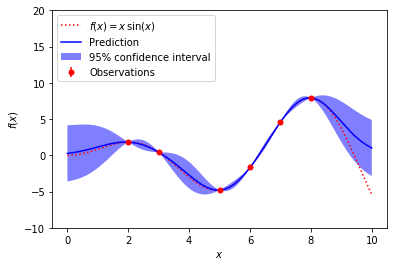

In [4]:
np.random.seed(2019)

X = np.atleast_2d([2., 3., 5., 6., 7., 8.]).T

# Instantiate a Gaussian Process model
# RBF: Gaussian kernel
# RBF(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0))
# k(x_i, x_j) = exp(-1 / 2 d(x_i / length_scale, x_j / length_scale)^2)

# C is the constant kernel used for scaling
# ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-05, 100000.0))

kernel = C(4.) * RBF(1.0)

# Noiseless case; noise = 0 (last argument of GPR_benchmark)
GPR_benchmark(X, kernel, 0)

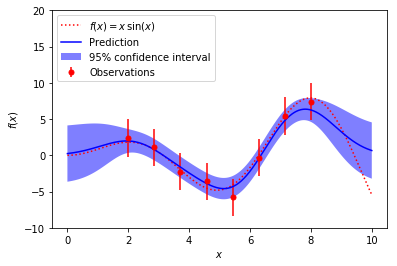

In [5]:
X = np.atleast_2d(np.linspace(2,8,8)).T

# Reference: C(4.) * RBF(1.0)
kernel = C(4.) * RBF(1.0)

# Noisy case
dy = 1.0 # Noise level

# Exercise: adjust the following parameters:
# Noise level with dy
# Confidence in prior with C
# Length-scale of kernel with RBF(d)

GPR_benchmark(X, kernel, dy)